In [48]:
import statsmodels.api as sm 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as snsinline
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
dataset1 = pd.read_excel("화재발생데이터.xls")
dataset2 = pd.read_excel('구조활동데이터.xls')


In [4]:
del dataset1['합계']

In [5]:
del dataset1['합계.1']

In [6]:
del dataset2['기타.1']

In [7]:
dataset1 = dataset1.rename(columns={'부동산':'부동산 화재 피해', '동산':'동산 화재 피해','방화 합계':'화재 발생 합계'})

In [8]:
number = dataset1['부동산 화재 피해'] / 1000
number2 = dataset1['동산 화재 피해'] / 1000
number3 = dataset1['재산피해경감액'] / 1000

In [9]:
dataset1['부동산 화재 피해'] = number
dataset1['동산 화재 피해'] = number2
dataset1['재산피해경감액'] = number3

In [10]:
dataset1

화재 발생 합계   실화  방화  기타 동수(동) 이재가구수(가구)  면적(㎡)  부동산 화재 피해  동산 화재 피해  \
0         184  159  13  12    45         -    505     66.522   152.034   
1         237  204   9  24    34         4   1321    224.084   384.212   
2         160  135  11  14    57        28   2728   1148.703   496.219   
3         196  162  19  15    47         2    867    111.603   252.979   
4         169  140  20   9    42         -    385    116.907   100.160   
5         229  170  20  39    68         7   1580    331.892   382.509   
6         228  182  31  15    75         -   1011    148.805   234.165   
7         221  174  20  27    63         5    924    167.525   315.315   
8         186  148  19  19    37         1    538    159.051   213.451   
9         190  146  25  19    42         3    936    144.105   319.207   
10        228  185  34   9    55         8    856    163.341   187.753   
11        234  200  28   6    39         3    860    117.947   174.352   
12        205  189  13   3    68         4   1433    202.858   191.796   
13        179  157  10  12   106         1   1367    268.054   467.419   
14        207  183  12  12    49         -    355     97.743   159.414   
15        260  228  15  17    66         -   1298    383.107   777.135   
16        159  124  18  17    79         1    859    167.053   337.938   
17        116   90  16  10    57         2    764    129.476   417.511   
18        222  171  29  22    68         -    859    131.551   382.711   
19        226  203  21   2    55         7    440    240.203   286.068   
20        211  185  15  11    66         9   2554    190.973   269.560   
21        230  184  17  29    73        24   3828    283.283   464.509   
22        372  322  22  28    99         8   2137    518.677   779.081   
23        235  166  49  20   101         -   1341    212.695   425.820   
24        237  188  38  11    72        14   2391    222.805   383.592   
25        182  141  22  19    58         1    854    106.450   213.182   
26        215  171  15  29    47         2   1896    446.940   664.642   
27        158  124  11  23    69         -   1420    286.884   583.726   
28        165  145   8  12    34         -    722    128.184   401.227   
29        166  139  13  14    28         1    794    200.391   409.270   
..        ...  ...  ..  ..   ...       ...    ...        ...       ...   
195       286  239  15  32    48         7   6818    320.771   333.919   
196       242  220   2  20     3         -   4190    284.206   411.461   
197       502  469   6  27    67         1   2210    771.016   794.242   
198       318  280   7  31    36         5   1079    250.145   389.082   
199       269  236   7  26    19         1   1202    188.487   230.106   
200       254  219   7  28    20        43    909    279.955   294.345   
201       275  244   7  24    63         8   1425    558.830   698.175   
202       211  165   5  41    21         1    405    123.288   271.615   
203       212  186   1  25    40         2    580    162.939   453.146   
204       203  175   2  26    30         -   1064    315.690   342.495   
205       203  175   4  24    93         -   1275    179.873   529.614   
206       254  235   4  15    25         -    893    103.281    98.140   
207       215  183   5  27    40         6    898    184.258   303.307   
208       203  180   4  19    29         1    211    104.658   112.180   
209       237  217   3  17    18         8    346     85.113   116.385   
210       229  200  11  18    15         5   1299    105.994   225.006   
211       214  184   4  26    12         2    872    217.662   201.841   
212       229  210  11   8    22         2    639    236.471  7641.030   
213       254  237   2  15    56         -    725    132.459   150.525   
214       219  204   4  11    15         1    388    136.819   220.750   
215       383  347  12  24    13        16   1062    196.115   197.286   
216       263  238  11  14    17         -    358     74.308   165.019   
217      

In [11]:
dataset2

인명구조  안전조치 기타활동 미처리(자체처리허위등)  사망   부상    기타   화재 교통사고 수난사고 기계사고 건물사고  \
0     321   556  294          708   3  232   276   80  116    -    8   87   
1     187   472  208          595   2   61   198   12   41    -    7   99   
2     338   917  112          178  11  173   495  195  143   49    3   76   
3     166   178  455          495   7   65   138   36   22   17    2   34   
4     258   301  422          536   8  109   227   23   48   29    3   65   
5     226   638  491          656   6   91   235   33   51    3    6  118   
6     361   555  271          672  16   94   377   22   36    1    6  120   
7     234   653  214          877   6   72   214   11   36    1    6   80   
8     209   436  189          605   8   66   193   14   12    -    1   62   
9     314   401  136          513   7  128   300   17   46    2    3  119   
10    454   375  340          876   6  159   339    5   24    2    4  106   
11    463   561  600          746   8  182   412   27   65    -    7  103   
12    335   861  161          544  11  108   477   28   95    -    1  233   
13    362   727  277          941  12  108   319    2   68   28    9  109   
14    353   369  199          798   3   83   402   10   57    -    5  189   
15    599   825  330          750  25  252   797  224  205   22    6  203   
16    336   595  165          604   3   76   370    7   57    1    4  109   
17    177   432  153          501   -   55   152    1   35    -    8   53   
18    437   603  257          904  33  102   553   20   87   84    6  215   
19    251   497  283          576  12   81   272   38   51   21    2  105   
20    498   772  312         1057   9  159   445   11   31    1    7  159   
21    325   828  138         1012  11  149   310   47   99   14    2  162   
22    504   770  594         1445  10  207   631   53  134   19   11  378   
23    451   918  395         1264  33  188   460   22   99   28    7  211   
24    439   466  341          733  17  154   497   46   92   14    7  174   
25    322   877  234          683   3  143   292   19   44    -    5    -   
26    203   458  348          400   8   88   234    7   45    -    9    -   
27    494  1108  130          318  26  266   507   71  269   89   14    -   
28    261   235  500          465  16  100   184   10   47   24    7    -   
29    288   179  817          404  17  120   263   34   54   35    8    -   
..    ...   ...  ...          ...  ..  ...   ...  ...  ...  ...  ...  ...   
307  1428  8356  440         2465   9  138  1246   36  169   32    8    6   
308   927  6241  529         1782  12  158  1007   77  161   44  146    -   
309   833  4560  292          639  11  103   854   13   58   26    3    -   
310     -     1    -            -   -    -     -    -    -    -    -    -   
311   439  4721  204          747   5   96   413   26   28    -    4    -   
312   466  4107  132          521   7   65   616   38   24    -   11    -   
313   585  3814  230          762  12   47   499   24   25  103    1    -   
314   516  3567  236          485  12   98   494   12   56   29    7    -   
315   780  2846  373          484  16   64   637   82   40   61    4    -   
316   645  4858  179          851  10   54   648   10   58    1    4    -   
317   569  4097  329          892  11   69   416   35   36    6    5    1   
318   399  4688  123          908   6   60   347    6   34    1    3    -   
319   469  3820  184          559   2   96   370   12   15    -    1    -   
320   739  3508  186          372  14  154  1009   47   30    2    1    -   
321   765  5374   98          679  15  110   929   40   82   11    3    -   
322   677  5530   93          883  12  165   568   14   24    -    1    -   
323   561  3837  136          799   9  110   511   25   72    -    7    -   
324   935  5352  165          748  11   60   749   12   48  142    2    -   
325   385  4377  115          468   3   28   516   13   20    -    1    -   
326   889  6705   85          790  24  100   721   25   72   19    3    -   
3

In [12]:
 test_temp = dataset1.corr(method="pearson")
print(test_temp)

           화재 발생 합계        실화        기타     면적(㎡)  부동산 화재 피해  동산 화재 피해  \
화재 발생 합계   1.000000  0.988187  0.342494  0.141142   0.569417  0.175091   
실화         0.988187  1.000000  0.245521  0.140712   0.559315  0.171303   
기타         0.342494  0.245521  1.000000  0.004267   0.250698  0.063683   
면적(㎡)      0.141142  0.140712  0.004267  1.000000   0.148996 -0.001004   
부동산 화재 피해  0.569417  0.559315  0.250698  0.148996   1.000000  0.330606   
동산 화재 피해   0.175091  0.171303  0.063683 -0.001004   0.330606  1.000000   
재산피해경감액    0.068411  0.081330  0.004046  0.027639   0.177548  0.282944   

            재산피해경감액  
화재 발생 합계   0.068411  
실화         0.081330  
기타         0.004046  
면적(㎡)      0.027639  
부동산 화재 피해  0.177548  
동산 화재 피해   0.282944  
재산피해경감액    1.000000  


In [24]:
x=dataset1[['부동산 화재 피해', '동산 화재 피해', '재산피해경감액']]

In [25]:
y=dataset1['화재 발생 합계']

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0)

In [27]:
from sklearn.model_selection import train_test_split
model = DecisionTreeRegressor(random_state=1)

In [28]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [29]:
model.predict(x_train)

array([230., 372., 203., 282., 269., 169., 303., 216., 220., 150., 213.,
       215., 244., 353., 179., 240., 254., 237., 211., 234., 200., 427.,
       194., 226., 215., 180., 217., 196., 206., 196., 197., 236., 241.,
       211., 242., 197., 278., 227., 194., 207., 158., 245., 212., 211.,
       276., 235., 215., 337., 221., 170., 173., 302., 160., 163., 251.,
       237., 214., 364., 228., 223., 295., 383., 258., 212., 254., 324.,
       304., 196., 219., 241., 222., 219., 250., 184., 159., 299., 209.,
       232., 337., 260., 436., 235., 185., 239., 175., 183., 340., 228.,
       252., 218., 331., 229., 286., 260., 159., 325., 238., 203., 234.,
       178., 208., 199., 220., 282., 237., 262., 200., 161., 221., 151.,
       205., 116., 209., 178., 197., 229., 203., 197., 144., 165., 209.,
       283., 210., 219., 192., 187., 318., 194., 173., 131., 235., 504.,
       166., 167., 225., 204., 242., 234., 214., 306., 278., 168., 385.,
       170., 182., 372., 158., 263., 311., 254., 23

In [30]:
model.score(x_test, y_test)

-1.2463728148232467

In [31]:
model.score(x_train, y_train)

1.0

In [32]:
test_train = dataset1[0:114]
test_test = dataset1[114:224]

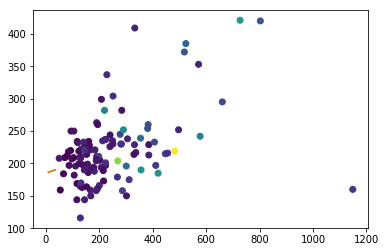

In [33]:
model1 = linear_model.LinearRegression()
x_var1= ['부동산 화재 피해', '동산 화재 피해', '재산피해경감액']
model1.fit(test_train[x_var1], test_train['화재 발생 합계'])

x = np.linspace(10,35,45)

plt.scatter(test_train['부동산 화재 피해'], test_train['화재 발생 합계'], c=test_train["동산 화재 피해"])
plt.plot(x, x*model1.coef_[0]+model1.coef_[1]+model1.intercept_)
plt.plot(x, x*model1.coef_[0]+model1.intercept_)
plt.show()


In [49]:
dataset1.keys()

Index(['화재 발생 합계', '실화', '방화', '기타', '동수(동)', '이재가구수(가구)', '면적(㎡)',
       '부동산 화재 피해', '동산 화재 피해', '재산피해경감액', '사망', '부상', '이재민수', '구조인원'],
      dtype='object')

In [50]:
df = dataset1[['부동산 화재 피해', '동산 화재 피해', '재산피해경감액', '화재 발생 합계']]

In [51]:
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)
kmeans.labels_
df['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, '부동산 화재 피해 & 화재 발생 합계')

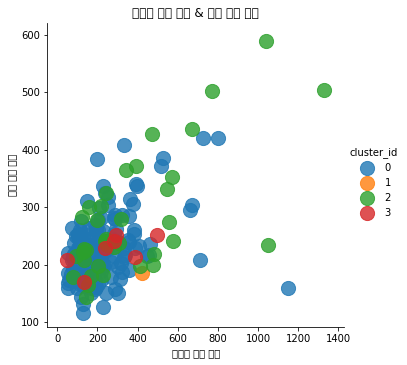

In [52]:
sns.lmplot('부동산 화재 피해', '화재 발생 합계', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('부동산 화재 피해 & 화재 발생 합계')

Text(0.5, 1.0, '동산 화재 피해 & 화재 발생 합계')

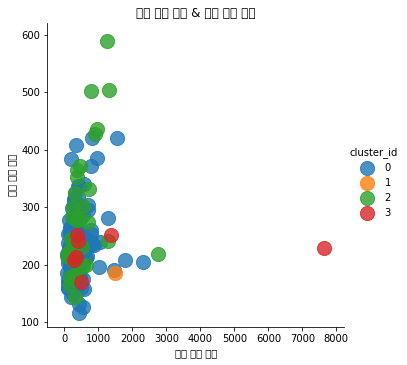

In [53]:
sns.lmplot('동산 화재 피해', '화재 발생 합계', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('동산 화재 피해 & 화재 발생 합계')

Text(0.5, 1.0, '재산피해경감액 & 화재 발생 합계')

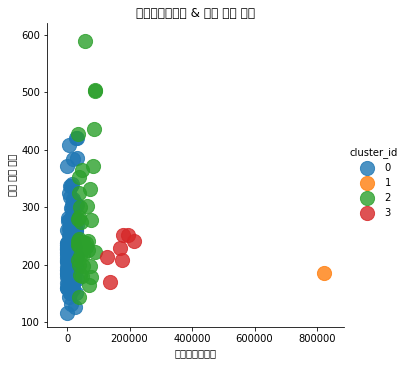

In [54]:
sns.lmplot('재산피해경감액', '화재 발생 합계', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('재산피해경감액 & 화재 발생 합계')

Text(0.5, 1.0, '재산피해경감액 & 동산 화재 피해')

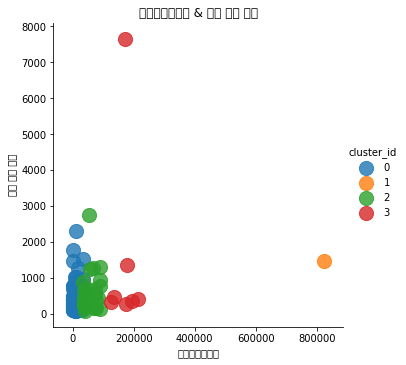

In [55]:
sns.lmplot('재산피해경감액', '동산 화재 피해', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('재산피해경감액 & 동산 화재 피해')

In [56]:
df = dataset1[['부동산 화재 피해','동산 화재 피해', '재산피해경감액', '화재 발생 합계']]

In [57]:
data_points = df.values

In [58]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [59]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0])

In [60]:
df['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '부동산 화재 피해 & 동산 화재 피해')

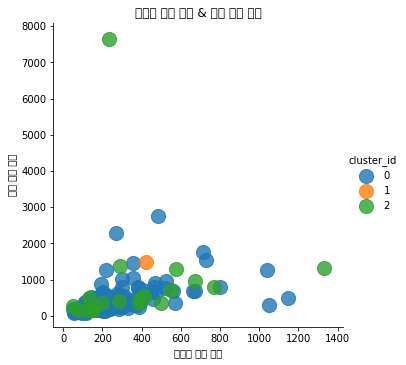

In [61]:
sns.lmplot('부동산 화재 피해', '동산 화재 피해', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('부동산 화재 피해 & 동산 화재 피해')

In [62]:
dataset2 = dataset2.replace("-",0)

In [63]:
test_temp = dataset1.corr(method="pearson")
print(test_temp)

           화재 발생 합계        실화        기타     면적(㎡)  부동산 화재 피해  동산 화재 피해  \
화재 발생 합계   1.000000  0.988187  0.342494  0.141142   0.569417  0.175091   
실화         0.988187  1.000000  0.245521  0.140712   0.559315  0.171303   
기타         0.342494  0.245521  1.000000  0.004267   0.250698  0.063683   
면적(㎡)      0.141142  0.140712  0.004267  1.000000   0.148996 -0.001004   
부동산 화재 피해  0.569417  0.559315  0.250698  0.148996   1.000000  0.330606   
동산 화재 피해   0.175091  0.171303  0.063683 -0.001004   0.330606  1.000000   
재산피해경감액    0.068411  0.081330  0.004046  0.027639   0.177548  0.282944   

            재산피해경감액  
화재 발생 합계   0.068411  
실화         0.081330  
기타         0.004046  
면적(㎡)      0.027639  
부동산 화재 피해  0.177548  
동산 화재 피해   0.282944  
재산피해경감액    1.000000  


In [64]:
test_temp = dataset2.corr(method="pearson")
test_temp

인명구조      안전조치      기타활동  미처리(자체처리허위등)        사망        부상  \
인명구조          1.000000  0.970403  0.840122      0.931646  0.925404  0.944326   
안전조치          0.970403  1.000000  0.803007      0.925241  0.872748  0.897495   
기타활동          0.840122  0.803007  1.000000      0.847245  0.821643  0.867261   
미처리(자체처리허위등)  0.931646  0.925241  0.847245      1.000000  0.864850  0.897434   
사망            0.925404  0.872748  0.821643      0.864850  1.000000  0.921310   
부상            0.944326  0.897495  0.867261      0.897434  0.921310  1.000000   
기타            0.982225  0.950852  0.865744      0.917033  0.922047  0.940187   
화재            0.783136  0.763223  0.790060      0.769389  0.789274  0.794594   
교통사고          0.914545  0.879750  0.824333      0.874895  0.900281  0.955676   
수난사고          0.795480  0.746210  0.643725      0.688944  0.840312  0.745447   
기계사고          0.777774  0.761487  0.715095      0.778149  0.734426  0.773628   
건물사고         -0.038929 -0.097871 -0.039352      0.034061  0.000961  0.013903   
승강기사고         0.958898  0.942037  0.835340      0.896553  0.872040  0.899524   
산악사고          0.711651  0.661062  0.617954      0.666582  0.652522  0.764380   
갇힘사고          0.970029  0.938468  0.870075      0.900270  0.904529  0.937126   
폭발사고         -0.016251 -0.072550 -0.041773      0.050218  0.020873  0.043572   

                    기타        화재      교통사고      수난사고      기계사고      건물사고  \
인명구조          0.982225  0.783136  0.914545  0.795480  0.777774 -0.038929   
안전조치          0.950852  0.763223  0.879750  0.746210  0.761487 -0.097871   
기타활동          0.865744  0.790060  0.824333  0.643725  0.715095 -0.039352   
미처리(자체처리허위등)  0.917033  0.769389  0.874895  0.688944  0.778149  0.034061   
사망            0.922047  0.789274  0.900281  0.840312  0.734426  0.000961   
부상            0.940187  0.794594  0.955676  0.745447  0.773628  0.013903   
기타            1.000000  0.854975  0.919176  0.777206  0.778599 -0.029722   
화재            0.854975  1.000000  0.784169  0.647742  0.668630 -0.015604   
교통사고          0.919176  0.784169  1.000000  0.758669  0.764416  0.009578   
수난사고          0.777206  0.647742  0.758669  1.000000  0.602351 -0.034314   
기계사고          0.778599  0.668630  0.764416  0.602351  1.000000 -0.023001   
건물사고         -0.029722 -0.015604  0.009578 -0.034314 -0.023001  1.000000   
승강기사고         0.968615  0.783791  0.881152  0.738791  0.752188 -0.128471   
산악사고          0.690567  0.533210  0.626041  0.415565  0.539050  0.290163   
갇힘사고          0.969749  0.787898  0.900311  0.728014  0.765032 -0.132094   
폭발사고         -0.013973  0.047138  0.044835 -0.007902 -0.001370  0.836693   

                 승강기사고      산악사고      갇힘사고      폭발사고  
인명구조          0.958898  0.711651  0.970029 -0.016251  
안전조치          0.942037  0.661062  0.938468 -0.072550  
기타활동          0.835340  0.617954  0.870075 -0.041773  
미처리(자체처리허위등)  0.896553  0.666582  0.900270  0.050218  
사망            0.872040  0.652522  0.904529  0.020873  
부상            0.899524  0.764380  0.937126  0.043572  
기타            0.968615  0.690567  0.969749 -0.013973  
화재            0.783791  0.533210  0.787898  0.047138  
교통사고          0.881152  0.626041  0.900311  0.044835  
수난사고          0.738791  0.415565  0.728014 -0.007902  
기계사고          0.752188  0.539050  0.765032 -0.001370  
건물사고         -0.128471  0.290163 -0.132094  0.836693  
승강기사고         1.000000  0.602774  0.954394 -0.126472  
산악사고          0.602774  1.000000  0.671967  0.327378  
갇힘사고          0.954394  0.671967  1.000000 -0.113819  
폭발사고         -0.126472  0.327378 -0.113819  1.000000

In [65]:
x = dataset2[['인명구조', '안전조치', '기타활동', '사망','부상','산악사고','갇힘사고','폭발사고']]
y = dataset2['화재']

In [66]:
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     화재   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           2.49e-91
Time:                        02:13:26   Log-Likelihood:                -2018.4
No. Observations:                 337   AIC:                             4053.
Df Residuals:                     329   BIC:                             4083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
인명구조          -0.1889      0.046     -4.090      0.000      -0.280      -0.098
안전조치           0.0208      0.005      4.442      0.000       0.012       0.030
기타활동           0.0521      0.011      4.627      0.000       0.030       0.074
사망             2.3908      0.756      3.163      0.002       0.904       3.878
부상             0.2313      0.093      2.483      0.014       0.048       0.415
산악사고          -0.3305      0.102     -3.254      0.001      -0.530      -0.131
갇힘사고           0.2244      0.092      2.444      0.015       0.044       0.405
폭발사고           1.5271      0.402      3.796      0.000       0.736       2.319
==============================================================================
Omnibus:                      443.810   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45925.234
Skew:                           6.225   Prob(JB):                         0.00
Kurtosis:                      58.818   Cond. No.                         794.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [68]:
predictions = lm.predict(x)

print(predictions)

[ 1.39837747e+02  1.01190950e+01  1.44347007e+02  8.43816188e+01
  3.60314963e+01  4.87502266e+01  4.00771264e+01  2.77003511e+01
  1.38164154e+01  2.27510334e+01  1.73414727e+01  8.25856668e+01
  1.60469516e+01  6.21180764e+01 -9.76107882e-01  1.10023908e+02
 -6.10048570e+00 -1.26107798e-01  1.12082906e+02  5.70974501e+01
  2.96408936e+01  4.04724816e+01  1.27688099e+02  1.61186974e+02
  6.15243498e+01 -1.96941066e+00  3.54319478e+01  7.54986614e+01
  4.41301000e+01  6.60701486e+01  5.48294984e+01  4.18890109e+01
  2.11803265e+01  1.13580422e+01 -7.56284429e-01 -1.32224052e+01
  5.52795318e+01  2.89496051e+01  6.73693718e+01  2.71497377e+01
  1.08411229e+02  6.56086022e+01  1.16030412e+01  1.16083745e+02
  2.67639415e+01  1.27100209e+01  3.88038279e+01  6.34092051e+01
  6.32772530e+01  9.24301591e+01 -2.40010407e+01 -9.24883416e+00
  3.15785238e+01  7.18799585e+01  4.82477475e+01  6.35485213e+01
  6.33170002e+01  3.36502219e+01  9.13848221e+00  1.53536550e+01
  1.72651740e+01 -2.43839

In [69]:
lm.score(x,y)

0.7115919599661953

예상 출력값

In [70]:
lm.coef_

array([-0.11252228,  0.01486867,  0.06010909,  2.30438088,  0.18406369,
       -0.32840229,  0.15755466,  1.58568696])

예상값

In [71]:
lm.intercept_

-24.294056390031912

절편값

In [72]:
import numpy as np
import math

In [73]:
dataset1.columns

Index(['화재 발생 합계', '실화', '방화', '기타', '동수(동)', '이재가구수(가구)', '면적(㎡)',
       '부동산 화재 피해', '동산 화재 피해', '재산피해경감액', '사망', '부상', '이재민수', '구조인원'],
      dtype='object')

In [74]:
dataset2

인명구조  안전조치  기타활동  미처리(자체처리허위등)  사망   부상    기타   화재  교통사고  수난사고  기계사고  \
0     321   556   294           708   3  232   276   80   116     0     8   
1     187   472   208           595   2   61   198   12    41     0     7   
2     338   917   112           178  11  173   495  195   143    49     3   
3     166   178   455           495   7   65   138   36    22    17     2   
4     258   301   422           536   8  109   227   23    48    29     3   
5     226   638   491           656   6   91   235   33    51     3     6   
6     361   555   271           672  16   94   377   22    36     1     6   
7     234   653   214           877   6   72   214   11    36     1     6   
8     209   436   189           605   8   66   193   14    12     0     1   
9     314   401   136           513   7  128   300   17    46     2     3   
10    454   375   340           876   6  159   339    5    24     2     4   
11    463   561   600           746   8  182   412   27    65     0     7   
12    335   861   161           544  11  108   477   28    95     0     1   
13    362   727   277           941  12  108   319    2    68    28     9   
14    353   369   199           798   3   83   402   10    57     0     5   
15    599   825   330           750  25  252   797  224   205    22     6   
16    336   595   165           604   3   76   370    7    57     1     4   
17    177   432   153           501   0   55   152    1    35     0     8   
18    437   603   257           904  33  102   553   20    87    84     6   
19    251   497   283           576  12   81   272   38    51    21     2   
20    498   772   312          1057   9  159   445   11    31     1     7   
21    325   828   138          1012  11  149   310   47    99    14     2   
22    504   770   594          1445  10  207   631   53   134    19    11   
23    451   918   395          1264  33  188   460   22    99    28     7   
24    439   466   341           733  17  154   497   46    92    14     7   
25    322   877   234           683   3  143   292   19    44     0     5   
26    203   458   348           400   8   88   234    7    45     0     9   
27    494  1108   130           318  26  266   507   71   269    89    14   
28    261   235   500           465  16  100   184   10    47    24     7   
29    288   179   817           404  17  120   263   34    54    35     8   
..    ...   ...   ...           ...  ..  ...   ...  ...   ...   ...   ...   
307  1428  8356   440          2465   9  138  1246   36   169    32     8   
308   927  6241   529          1782  12  158  1007   77   161    44   146   
309   833  4560   292           639  11  103   854   13    58    26     3   
310     0     1     0             0   0    0     0    0     0     0     0   
311   439  4721   204           747   5   96   413   26    28     0     4   
312   466  4107   132           521   7   65   616   38    24     0    11   
313   585  3814   230           762  12   47   499   24    25   103     1   
314   516  3567   236           485  12   98   494   12    56    29     7   
315   780  2846   373           484  16   64   637   82    40    61     4   
316   645  4858   179           851  10   54   648   10    58     1     4   
317   569  4097   329           892  11   69   416   35    36     6     5   
318   399  4688   123           908   6   60   347    6    34     1     3   
319   469  3820   184           559   2   96   370   12    15     0     1   
320   739  3508   186           372  14  154  1009   47    30     2     1   
321   765  5374    98           679  15  110   929   40    82    11     3   
322   677  5530    93           883  12  165   568   14    24     0     1   
323   561  3837   136           799   9  110   511   25    72     0     7   
324   935  5352   165           748  11   60   749   12    48   142     2   
325   385  4377   115           468   3   28   516   13    20     0     1   
326   889  6705    85           790  24  100   721   25    72    19     3   
3

In [75]:
dataset2 = dataset2.replace('-',0)

In [76]:
dataset2

인명구조  안전조치  기타활동  미처리(자체처리허위등)  사망   부상    기타   화재  교통사고  수난사고  기계사고  \
0     321   556   294           708   3  232   276   80   116     0     8   
1     187   472   208           595   2   61   198   12    41     0     7   
2     338   917   112           178  11  173   495  195   143    49     3   
3     166   178   455           495   7   65   138   36    22    17     2   
4     258   301   422           536   8  109   227   23    48    29     3   
5     226   638   491           656   6   91   235   33    51     3     6   
6     361   555   271           672  16   94   377   22    36     1     6   
7     234   653   214           877   6   72   214   11    36     1     6   
8     209   436   189           605   8   66   193   14    12     0     1   
9     314   401   136           513   7  128   300   17    46     2     3   
10    454   375   340           876   6  159   339    5    24     2     4   
11    463   561   600           746   8  182   412   27    65     0     7   
12    335   861   161           544  11  108   477   28    95     0     1   
13    362   727   277           941  12  108   319    2    68    28     9   
14    353   369   199           798   3   83   402   10    57     0     5   
15    599   825   330           750  25  252   797  224   205    22     6   
16    336   595   165           604   3   76   370    7    57     1     4   
17    177   432   153           501   0   55   152    1    35     0     8   
18    437   603   257           904  33  102   553   20    87    84     6   
19    251   497   283           576  12   81   272   38    51    21     2   
20    498   772   312          1057   9  159   445   11    31     1     7   
21    325   828   138          1012  11  149   310   47    99    14     2   
22    504   770   594          1445  10  207   631   53   134    19    11   
23    451   918   395          1264  33  188   460   22    99    28     7   
24    439   466   341           733  17  154   497   46    92    14     7   
25    322   877   234           683   3  143   292   19    44     0     5   
26    203   458   348           400   8   88   234    7    45     0     9   
27    494  1108   130           318  26  266   507   71   269    89    14   
28    261   235   500           465  16  100   184   10    47    24     7   
29    288   179   817           404  17  120   263   34    54    35     8   
..    ...   ...   ...           ...  ..  ...   ...  ...   ...   ...   ...   
307  1428  8356   440          2465   9  138  1246   36   169    32     8   
308   927  6241   529          1782  12  158  1007   77   161    44   146   
309   833  4560   292           639  11  103   854   13    58    26     3   
310     0     1     0             0   0    0     0    0     0     0     0   
311   439  4721   204           747   5   96   413   26    28     0     4   
312   466  4107   132           521   7   65   616   38    24     0    11   
313   585  3814   230           762  12   47   499   24    25   103     1   
314   516  3567   236           485  12   98   494   12    56    29     7   
315   780  2846   373           484  16   64   637   82    40    61     4   
316   645  4858   179           851  10   54   648   10    58     1     4   
317   569  4097   329           892  11   69   416   35    36     6     5   
318   399  4688   123           908   6   60   347    6    34     1     3   
319   469  3820   184           559   2   96   370   12    15     0     1   
320   739  3508   186           372  14  154  1009   47    30     2     1   
321   765  5374    98           679  15  110   929   40    82    11     3   
322   677  5530    93           883  12  165   568   14    24     0     1   
323   561  3837   136           799   9  110   511   25    72     0     7   
324   935  5352   165           748  11   60   749   12    48   142     2   
325   385  4377   115           468   3   28   516   13    20     0     1   
326   889  6705    85           790  24  100   721   25    72    19     3   
3

In [77]:
dataset2.keys()

Index(['인명구조', '안전조치', '기타활동', '미처리(자체처리허위등)', '사망', '부상', '기타', '화재', '교통사고',
       '수난사고', '기계사고', '건물사고', '승강기사고', '산악사고', '갇힘사고', '폭발사고'],
      dtype='object')

In [78]:
df2 = dataset2[['사망', '부상', '화재', '안전조치', '교통사고']]

In [79]:
df2['부상'] = df2['부상'] / 10
df2['안전조치'] = df2['안전조치'] / 100
df2['교통사고'] = df2['교통사고'] / 10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [80]:
data_points = df2.values
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_
df2['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [81]:
df2

사망    부상   화재   안전조치  교통사고  cluster_id
0     3  23.2   80   5.56  11.6           0
1     2   6.1   12   4.72   4.1           0
2    11  17.3  195   9.17  14.3           0
3     7   6.5   36   1.78   2.2           0
4     8  10.9   23   3.01   4.8           0
5     6   9.1   33   6.38   5.1           0
6    16   9.4   22   5.55   3.6           0
7     6   7.2   11   6.53   3.6           0
8     8   6.6   14   4.36   1.2           0
9     7  12.8   17   4.01   4.6           0
10    6  15.9    5   3.75   2.4           0
11    8  18.2   27   5.61   6.5           0
12   11  10.8   28   8.61   9.5           0
13   12  10.8    2   7.27   6.8           0
14    3   8.3   10   3.69   5.7           0
15   25  25.2  224   8.25  20.5           0
16    3   7.6    7   5.95   5.7           0
17    0   5.5    1   4.32   3.5           0
18   33  10.2   20   6.03   8.7           0
19   12   8.1   38   4.97   5.1           0
20    9  15.9   11   7.72   3.1           0
21   11  14.9   47   8.28   9.9           0
22   10  20.7   53   7.70  13.4           0
23   33  18.8   22   9.18   9.9           0
24   17  15.4   46   4.66   9.2           0
25    3  14.3   19   8.77   4.4           0
26    8   8.8    7   4.58   4.5           0
27   26  26.6   71  11.08  26.9           0
28   16  10.0   10   2.35   4.7           0
29   17  12.0   34   1.79   5.4           0
..   ..   ...  ...    ...   ...         ...
307   9  13.8   36  83.56  16.9           0
308  12  15.8   77  62.41  16.1           0
309  11  10.3   13  45.60   5.8           0
310   0   0.0    0   0.01   0.0           0
311   5   9.6   26  47.21   2.8           0
312   7   6.5   38  41.07   2.4           0
313  12   4.7   24  38.14   2.5           0
314  12   9.8   12  35.67   5.6           0
315  16   6.4   82  28.46   4.0           0
316  10   5.4   10  48.58   5.8           0
317  11   6.9   35  40.97   3.6           0
318   6   6.0    6  46.88   3.4           0
319   2   9.6   12  38.20   1.5           0
320  14  15.4   47  35.08   3.0           0
321  15  11.0   40  53.74   8.2           0
322  12  16.5   14  55.30   2.4           0
323   9  11.0   25  38.37   7.2           0
324  11   6.0   12  53.52   4.8           0
325   3   2.8   13  43.77   2.0           0
326  24  10.0   25  67.05   7.2           0
327   9   5.2   17  46.88   2.8           0
328   2   6.4   33  30.45   2.3           0
329  43  20.1   72  62.46  10.2           0
330  19   3.6   14  37.26   2.6           0
331  10  14.2   40  54.69   4.3           0
332  10   7.8   41  59.02   7.6           0
333  11   8.5   42  76.59   5.3           0
334  23   9.9   38  55.12   8.9           0
335  11   9.1   25  47.19   5.3           0
336   0   0.0    0   0.02   0.0           0

[337 rows x 6 columns]

Text(0.5, 1.0, '부상 & 화재')

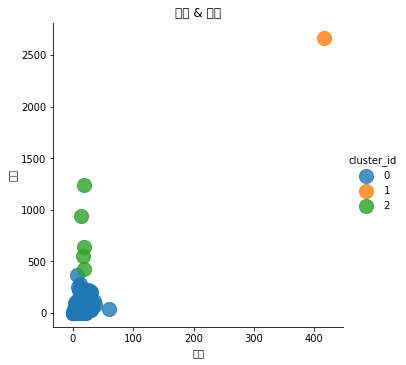

In [82]:
sns.lmplot('부상', '화재', data=df2, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('부상 & 화재')

In [83]:
tnum = pd.concat([dataset1, dataset2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
clu_model = KMeans(n_clusters=3, algorithm='auto')
clu_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
feature = dataset1[ ['화재 발생 합계','부동산 화재 피해','동산 화재 피해']]
feature.head()


화재 발생 합계  부동산 화재 피해  동산 화재 피해
0       184     66.522   152.034
1       237    224.084   384.212
2       160   1148.703   496.219
3       196    111.603   252.979
4       169    116.907   100.160

In [86]:
clu_model.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
predict = pd.DataFrame(clu_model.predict(feature))

In [88]:
predict.columns=['predict']

In [89]:
r = pd.concat([feature,predict],axis=1)

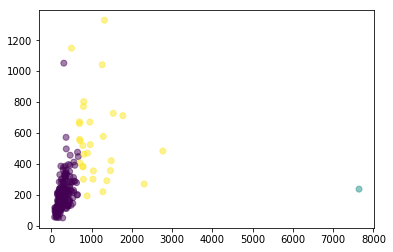

In [90]:
plt.scatter(r['동산 화재 피해'],r['부동산 화재 피해'],c=r['predict'],alpha=0.5)


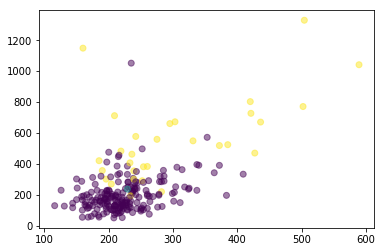

In [91]:
plt.scatter(r['화재 발생 합계'],r['부동산 화재 피해'],c=r['predict'],alpha=0.5)

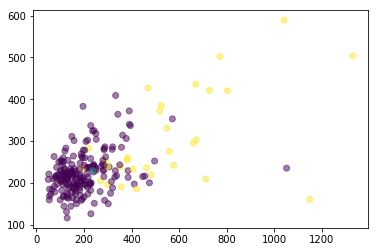

In [92]:
plt.scatter(r['부동산 화재 피해'],r['화재 발생 합계'],c=r['predict'],alpha=0.5)

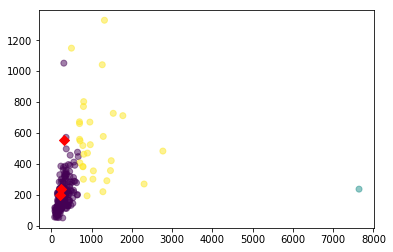

In [93]:
centers = pd.DataFrame(clu_model.cluster_centers_,columns=['동산 화재 피해','부동산 화재 피해','화재 발생 합계'])
center_x = centers['동산 화재 피해']
center_y = centers['부동산 화재 피해']
plt.scatter(r['동산 화재 피해'],r['부동산 화재 피해'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [94]:
dataset3 = pd.read_excel('화재 발생 요일.xlsx')

In [95]:
dataset3

구분     계  일요일  월요일  화요일  수요일  목요일  금요일  토요일
0      합계  5724  787  899  777  808  795  821  837
1     종로구   245   28   42   31   42   36   37   29
2      중구   196   17   40   29   26   33   25   26
3     용산구   150   27   24   16   19   17   20   27
4     성동구   197   25   32   23   29   25   31   32
5     광진구   217   27   26   31   30   35   33   35
6    동대문구   188   31   27   21   33   28   29   19
7     중랑구   200   28   33   29   29   23   27   31
8     성북구   220   31   36   21   27   29   33   43
9     강북구   201   29   38   21   25   32   30   26
10    도봉구   163   24   24   14   25   25   23   28
11    노원구   234   33   31   30   33   31   37   39
12    은평구   220   39   32   34   30   30   27   28
13   서대문구   173   25   30   27   23   21   31   16
14    마포구   209   20   41   33   25   21   34   35
15    양천구   209   31   33   39   29   32   15   30
16    강서구   282   33   42   39   39   46   45   38
17    구로구   213   26   29   36   29   30   32   31
18    금천구   164   20   23   32   23   15   24   27
19   영등포구   252   33   32   35   27   37   42   46
20    동작구   209   29   36   20   41   29   29   25
21    관악구   409   73   65   46   62   54   53   56
22    서초구   230   20   39   32   33   35   35   36
23    강남구   385   56   60   62   51   57   55   44
24    송파구   295   43   37   43   38   41   37   56
25    강동구   263   39   47   33   40   33   37   34
26     합계  5646  786  812  744  814  782  839  869
27    종로구   254   28   50   32   31   38   37   38
28     중구   190   28   27   33   31   22   24   25
29    용산구   170   29   25   20   29   25   19   23
..    ...   ...  ...  ...  ...  ...  ...  ...  ...
152   서초구   242   33   32   33   43   36   36   29
153   강남구   502   80   77   74   65   69   79   58
154   송파구   318   56   38   51   51   47   41   34
155   강동구   269   37   38   48   23   39   35   49
156    합계  6368  864  941  827  903  900  957  976
157   종로구   254   31   40   38   37   36   38   34
158    중구   275   31   48   31   45   38   35   47
159   용산구   211   32   33   20   34   34   23   35
160   성동구   212   30   29   31   40   21   27   34
161   광진구   203   27   35   29   22   27   26   37
162  동대문구   203   24   22   23   35   33   29   37
163   중랑구   254   37   43   35   40   32   34   33
164   성북구   215   34   28   27   25   22   45   34
165   강북구   203   20   32   27   27   36   32   29
166   도봉구   237   26   48   29   29   28   41   36
167   노원구   229   31   32   28   32   36   32   38
168   은평구   214   29   33   33   31   22   33   33
169  서대문구   229   32   36   21   22   37   41   40
170   마포구   254   33   28   37   38   39   41   38
171   양천구   219   38   21   35   27   31   27   40
172   강서구   383   56   61   50   55   50   52   59
173   구로구   263   39   39   40   42   26   37   40
174   금천구   168   17   30   18   25   26   28   24
175  영등포구   258   36   39   28   35   42   44   34
176   동작구   205   37   30   20   30   32   32   24
177   관악구   337   47   53   45   48   53   51   40
178   서초구   242   29   38   35   34   33   33   40
179   강남구   436   43   56   77   59   56   83   62
180   송파구   340   52   45   35   50   56   47   55
181   강동구   324   53   42   35   41   54   46   53

[182 rows x 9 columns]

In [96]:
test_temp2 = dataset3.corr(method="pearson")
print(test_temp2)

            계       일요일       월요일       화요일       수요일       목요일       금요일  \
계    1.000000  0.998416  0.998202  0.998155  0.999013  0.999297  0.999211   
일요일  0.998416  1.000000  0.996564  0.995618  0.996318  0.997331  0.996947   
월요일  0.998202  0.996564  1.000000  0.994906  0.996621  0.996448  0.996742   
화요일  0.998155  0.995618  0.994906  1.000000  0.997295  0.998081  0.997226   
수요일  0.999013  0.996318  0.996621  0.997295  1.000000  0.998305  0.998086   
목요일  0.999297  0.997331  0.996448  0.998081  0.998305  1.000000  0.998648   
금요일  0.999211  0.996947  0.996742  0.997226  0.998086  0.998648  1.000000   
토요일  0.998804  0.997312  0.997159  0.995253  0.997600  0.997424  0.997860   

          토요일  
계    0.998804  
일요일  0.997312  
월요일  0.997159  
화요일  0.995253  
수요일  0.997600  
목요일  0.997424  
금요일  0.997860  
토요일  1.000000  


In [97]:
print("화재 발생 요일 키: \n{}".format(dataset3.keys()))

화재 발생 요일 키: 
Index(['구분', '계', '일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일'], dtype='object')


In [98]:
print("화재 발생 요일 키: \n{}".format(dataset3['구분'][:5]))

화재 발생 요일 키: 
0     합계
1    종로구
2     중구
3    용산구
4    성동구
Name: 구분, dtype: object


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
dataset3['월요일'], dataset3['화요일'], random_state=0)

In [100]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (136,)
y_train 크기: (136,)


In [101]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (46,)
y_test 크기: (46,)


In [102]:
X_train = X_train.values.reshape(-1, 1) 
y_train = y_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1) 
y_test= y_test.values.reshape(-1, 1) 

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [104]:
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [105]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [106]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [ 32  26  14  40  39  40  40  35  26  50  26  23  51 945  20  35  34  20
  27  35  50  26  44  20  34  35  29  50  34  35  48  31 772  17  20  40
  35  25  24  24  34  44  48  26  26  26]


In [107]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.02


In [108]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.00


In [109]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(dataset3['구분'][prediction]))

ValueError: query data dimension must match training data dimension

In [110]:
dataset4 = pd.read_excel('test.xlsx')

In [111]:
print("화재 발생 요일 키: \n{}".format(dataset4.keys()))

화재 발생 요일 키: 
Index(['label', '화재 종류', '화재건수', '사망', '부상', '인명피해 계', '재산피해(천원)',
       '재산피해/건당(천원)'],
      dtype='object')


In [112]:
print("data의 처음 다섯 행:\n{}".format(dataset4['화재 종류']))

data의 처음 다섯 행:
0           가스누출(폭발)
1               교통사고
2             과열 과부하
3                 노후
4            수동제어 실패
5                 역화
6             오일연료누설
7            자동제어 실패
8               정비불량
9          기타(기계적요인)
10                방화
11              방화의심
12          가연물 근접방치
13            논임야태우기
14              담배꽁초
15          불씨불꽃화원방치
16               불장난
17              빨래삶기
18            쓰레기 소각
19          용접 절단 연마
20            유류 취급중
21           음식물 조리중
22              폭죽놀이
23           기타(부주의)
24            돋보기 효과
25            자연적 재해
26        기타(자연적인요인)
27           과부하/과전류
28              누전지락
29             미확인단락
30               반단선
31       압착손상에 의한 단락
32       절연열화에 의한 단락
33       접촉불량에 의한 단락
34              층간단락
35        트래킹에 의한 단락
36         기타(전기적요인)
37      금수성물질의 물과 접촉
38              자연발화
39              혼촉발화
40    화학적 발화(유증기 확산)
41            화학적 폭발
42         기타(화학적요인)
43                미상
44                기타
Name: 화재 종류, dtype: object


In [113]:
print("data의 처음 다섯 행:\n{}".format(dataset4['화재건수']))

data의 처음 다섯 행:
0      146
1      520
2     2967
3      259
4       25
5       39
6      310
7      191
8      181
9      539
10     467
11     795
12    1000
13    1098
14    6842
15    2866
16     389
17     187
18    3441
19    1103
20      91
21    4515
22      28
23    1965
24      25
25      88
26     170
27     871
28     326
29    2170
30     151
31     606
32    2290
33     950
34      97
35     799
36     719
37      13
38     312
39       9
40      57
41      21
42      40
43    3910
44     847
Name: 화재건수, dtype: int64


In [114]:
number = dataset4['재산피해(천원)'] / 1000
dataset4['재산피해(천원)'] = number

In [115]:
dataset4

label           화재 종류  화재건수  사망   부상  인명피해 계    재산피해(천원)  재산피해/건당(천원)
0       1        가스누출(폭발)   146   2   92      94    2059.437        14106
1       2            교통사고   520   4   29      33    5711.662        10984
2       3          과열 과부하  2967   4   43      47   18651.441         6286
3       4              노후   259   0    7       7     720.626         2782
4       5         수동제어 실패    25   0    3       3      51.851         2074
5       6              역화    39   1    4       5     136.603         3503
6       7          오일연료누설   310   0   12      12    1668.601         5383
7       8         자동제어 실패   191   0    2       2    1834.401         9604
8       9            정비불량   181   0    9       9     751.642         4153
9      10       기타(기계적요인)   539   0   14      14    5670.818        10521
10     11              방화   467  30  111     141   36695.083        78576
11     12            방화의심   795  25   79     104    3757.834         4727
12     13        가연물 근접방치  1000   1   45      46    4190.294         4190
13     14          논임야태우기  1098   9   22      31    1253.091         1141
14     15            담배꽁초  6842   7   76      83   15174.741         2218
15     16        불씨불꽃화원방치  2866   9  109     118   12081.937         4216
16     17             불장난   389   1    4       5     294.668          758
17     18            빨래삶기   187   0    1       1      18.485           99
18     19          쓰레기 소각  3441   2   47      49    5869.383         1706
19     20        용접 절단 연마  1103   6   55      61   19101.864        17318
20     21          유류 취급중    91   2   37      39     644.774         7085
21     22         음식물 조리중  4515  12  132     144    5022.364         1112
22     23            폭죽놀이    28   0    0       0      11.291          403
23     24         기타(부주의)  1965  14  256     270   13608.774         6926
24     25          돋보기 효과    25   0    0       0      43.990         1760
25     26          자연적 재해    88   0    0       0     430.114         4888
26     27      기타(자연적인요인)   170   0    2       2     815.225         4795
27     28         과부하/과전류   871   1   19      20    3375.766         3876
28     29            누전지락   326   0    5       5    1357.837         4165
29     30           미확인단락  2170  17   88     105   29997.814        13824
30     31             반단선   151   2    7       9    1175.329         7784
31     32     압착손상에 의한 단락   606   3   27      30   11329.739        18696
32     33     절연열화에 의한 단락  2290   4   72      76   18383.589         8028
33     34     접촉불량에 의한 단락   950   5   14      19    4032.574         4245
34     35            층간단락    97   1    1       2     632.645         6522
35     36      트래킹에 의한 단락   799   2   16      18    2594.865         3248
36     37       기타(전기적요인)   719   1   24      25    4293.298         5971
37     38    금수성물질의 물과 접촉    13   0    0       0      23.044         1773
38     39            자연발화   312   0    2       2    6900.235        22116
39     40            혼촉발화     9   0    0       0     654.526        72725
40     41  화학적 발화(유증기 확산)    57   1   24      25    1521.498        26693
41     42          화학적 폭발    21   0    6       6     196.012         9334
42     43       기타(화학적요인)    40   0    5       5    2064.697        51617
43     44              미상  3910  84  303     387  179223.300        45837
44     45              기타   847   3   36      39    9180.811        10839

In [159]:
x = dataset4['화재건수']

In [160]:
y = dataset4['사망']

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y, random_state=0)

In [162]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_train 크기: (33,)
y_train 크기: (33,)
X_test 크기: (12,)
y_test 크기: (12,)


In [163]:
X_train = X_train.values.reshape(-1, 1) 
y_train = y_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1) 
y_test= y_test.values.reshape(-1, 1) 

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [165]:
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [166]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 0 3 0 4 1 0 2 0 0 4 1]


In [167]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.22
테스트 세트의 정확도: 0.42


In [168]:
X_new = np.array([[5]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 1)


In [169]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(dataset4['화재 종류'][prediction]))

예측: [0]
예측한 타깃의 이름: 0    가스누출(폭발)
Name: 화재 종류, dtype: object


In [170]:
dataset4.columns

Index(['label', '화재 종류', '화재건수', '사망', '부상', '인명피해 계', '재산피해(천원)',
       '재산피해/건당(천원)'],
      dtype='object')

In [171]:
df3 = dataset4[['화재건수', '사망', '부상', '인명피해 계', '재산피해(천원)']]

In [172]:
data_points = df3.values
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_
df3['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, '화재건수 & 인명피해 계')

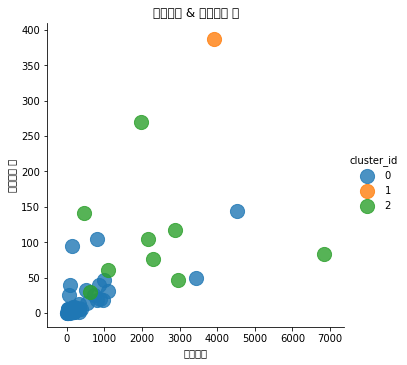

In [173]:
sns.lmplot('화재건수', '인명피해 계', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('화재건수 & 인명피해 계')

Text(0.5, 1.0, '사망 & 인명피해 계')

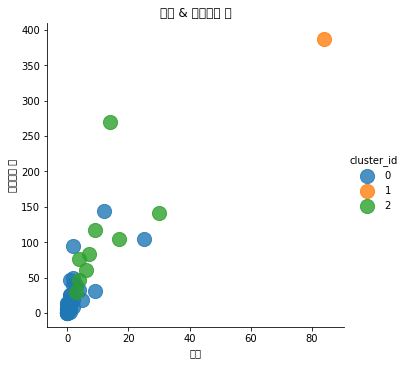

In [174]:
sns.lmplot('사망', '인명피해 계', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('사망 & 인명피해 계')

Text(0.5, 1.0, '부상 & 인명피해 계')

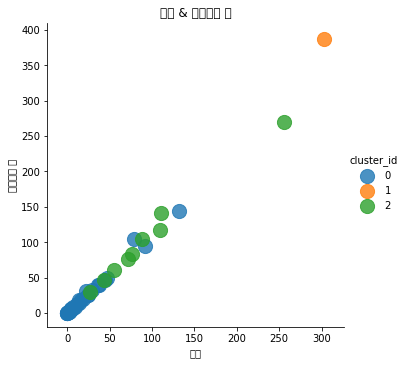

In [175]:
sns.lmplot('부상', '인명피해 계', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('부상 & 인명피해 계')

Text(0.5, 1.0, '재산피해(천원) & 인명피해 계')

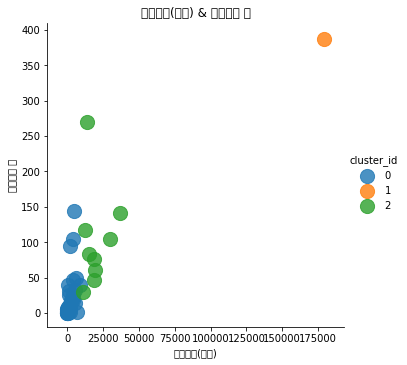

In [176]:
sns.lmplot('재산피해(천원)', '인명피해 계', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('재산피해(천원) & 인명피해 계')

Text(0.5, 1.0, '사망 & 화재건수')

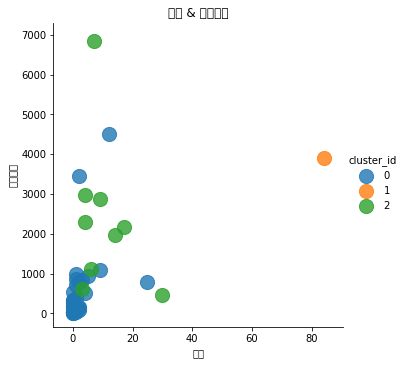

In [177]:
sns.lmplot('사망', '화재건수', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('사망 & 화재건수')

Text(0.5, 1.0, '부상 & 화재건수')

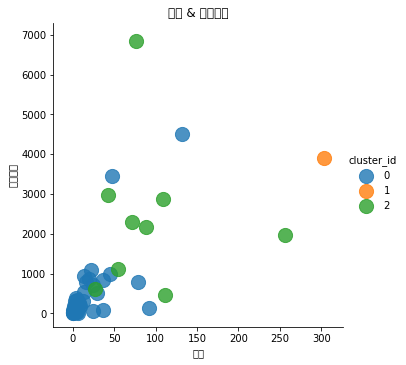

In [178]:
sns.lmplot('부상', '화재건수', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('부상 & 화재건수')

Text(0.5, 1.0, '인명피해 계 & 화재건수')

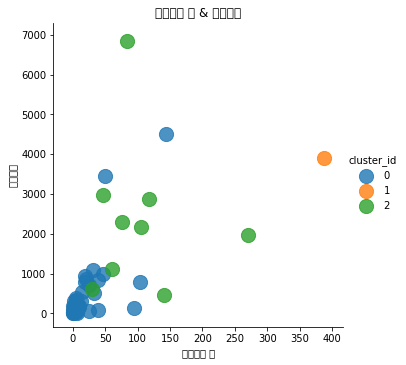

In [179]:
sns.lmplot('인명피해 계', '화재건수', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('인명피해 계 & 화재건수')

Text(0.5, 1.0, '재산피해(천원) & 화재건수')

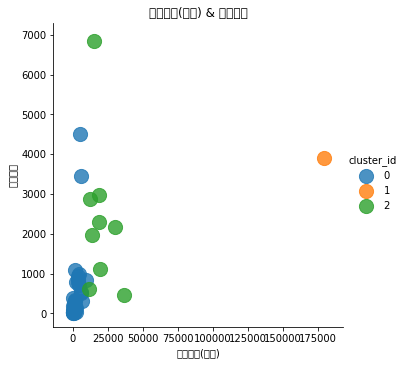

In [180]:
sns.lmplot('재산피해(천원)', '화재건수', data=df3, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('재산피해(천원) & 화재건수')

In [181]:
dataset5 = pd.read_excel('dataset2.xlsx')

In [182]:
dataset5

Call Number Unit ID  Incident Number          Call Type  \
0         191314006     T06         19055883     Structure Fire   
1         191314006     E06         19055883     Structure Fire   
2         191314017    KM14         19055884   Medical Incident   
3         191314004    KM07         19055882   Medical Incident   
4         191314004     E28         19055882   Medical Incident   
5         191313987      64         19055881   Medical Incident   
6         191313985    KM03         19055880  Traffic Collision   
7         191313985     E35         19055880  Traffic Collision   
8         191313976     B10         19055879             Alarms   
9         191313976     E37         19055879             Alarms   
10        191313976     T04         19055879             Alarms   
11        191313975      70         19055878   Medical Incident   
12        191313956   AM114         19055877   Medical Incident   
13        191313956     T11         19055877   Medical Incident   
14        191313947     B02         19055876             Alarms   
15        191313947     E06         19055876             Alarms   
16        191313947     T06         19055876             Alarms   
17        191313909      82         19055875   Medical Incident   
18        191313884      62         19055874   Medical Incident   
19        191313871      79         19055872   Medical Incident   
20        191313868     E18         19055871   Medical Incident   
21        191313868      84         19055871   Medical Incident   
22        191313851      85         19055870   Medical Incident   
23        191313851     E42         19055870   Medical Incident   
24        191313828    QRV1         19055869   Medical Incident   
25        191313828   AM116         19055869   Medical Incident   
26        191313810     E17         19055868   Medical Incident   
27        191313810     RC4         19055868   Medical Incident   
28        191313810      57         19055868   Medical Incident   
29        191313810      94         19055868   Medical Incident   
...             ...     ...              ...                ...   
216573    182403136      74         18101143   Medical Incident   
216574    182403136    QRV2         18101143   Medical Incident   
216575    182403136    QRV1         18101143   Medical Incident   
216576    182403123      79         18101142   Medical Incident   
216577    182403118      93         18101141   Medical Incident   
216578    182403094      77         18101140  Traffic Collision   
216579    182403094   AM116         18101140  Traffic Collision   
216580    182403094     E28         18101140  Traffic Collision   
216581    182403094     RC1         18101140  Traffic Collision   
216582    182403042    KM01         18101137   Medical Incident   
216583    182403043      70         18101138   Medical Incident   
216584    182403043     E08         18101138   Medical Incident   
216585    182403023    KM02         18101136   Medical Incident   
216586    182403023     E31         18101136   Medical Incident   
216587    182402976     B07         18101135              Other   
216588    182402976     T14         18101135              Other   
216589    182402967     E10         18101134             Alarms   
216590    182402967     T10         18101134             Alarms   
216591    182402967     B04         18101134             Alarms   
216592    182402961      82         18101132   Medical Incident   
216593    182402961     E07         18101132   Medical Incident   
216594    182402965      60         18101133   Medical Incident   
216595    182402965      76         18101133   Medical Incident   
216596    182402955     E39         18101131   Medical Incident   
216597    182402946     E05         18101130   Medical Incident   
216598    182402946      67         18101130   Medical Incident   
216599    182402938      63         18101128   Medical Incident   
216600    182402938     E17         18101128   Medical 

In [183]:
dataset5.columns

Index(['Call Number', 'Unit ID', 'Incident Number', 'Call Type', 'Call Date',
       'Watch Date', 'Received DtTm', 'Entry DtTm', 'Dispatch DtTm',
       'Response DtTm', 'On Scene DtTm', 'Transport DtTm', 'Hospital DtTm',
       'Call Final Disposition', 'Available DtTm', 'Address', 'City',
       'Zipcode of Incident', 'Battalion', 'Station Area', 'Box',
       'Original Priority', 'Priority', 'Final Priority', 'ALS Unit',
       'Call Type Group', 'Number of Alarms', 'Unit Type',
       'Unit sequence in call dispatch', 'Fire Prevention District',
       'Supervisor District', 'Neighborhooods - Analysis Boundaries',
       'Location', 'RowID', 'Supervisor Districts',
       'Fire Prevention Districts', 'Current Police Districts',
       'Neighborhoods - Analysis Boundaries', 'Zip Codes', 'Neighborhoods',
       'Police Districts', 'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones'],
      dtype='object')

In [184]:
dataset6 = dataset5[['Call Type', 'City', 'Fire Prevention Districts', 'Current Police Districts']]

In [208]:
dataset6

Call Type           City  Fire Prevention Districts  \
0          Structure Fire  San Francisco                        8.0   
1          Structure Fire  San Francisco                        8.0   
2        Medical Incident  San Francisco                       13.0   
3        Medical Incident  San Francisco                        3.0   
4        Medical Incident  San Francisco                        3.0   
5        Medical Incident  San Francisco                        3.0   
6       Traffic Collision  San Francisco                        6.0   
7       Traffic Collision  San Francisco                        6.0   
8                  Alarms  San Francisco                       10.0   
9                  Alarms  San Francisco                       10.0   
10                 Alarms  San Francisco                       10.0   
11       Medical Incident  San Francisco                       13.0   
12       Medical Incident  San Francisco                        2.0   
13       Medical Incident  San Francisco                        2.0   
14                 Alarms  San Francisco                        8.0   
15                 Alarms  San Francisco                        8.0   
16                 Alarms  San Francisco                        8.0   
17       Medical Incident  San Francisco                        5.0   
18       Medical Incident  San Francisco                       10.0   
19       Medical Incident  San Francisco                        5.0   
20       Medical Incident  San Francisco                        1.0   
21       Medical Incident  San Francisco                        1.0   
22       Medical Incident  San Francisco                       10.0   
23       Medical Incident  San Francisco                       10.0   
24       Medical Incident  San Francisco                        7.0   
25       Medical Incident  San Francisco                        7.0   
26       Medical Incident  San Francisco                       10.0   
27       Medical Incident  San Francisco                       10.0   
28       Medical Incident  San Francisco                       10.0   
29       Medical Incident  San Francisco                       10.0   
...                   ...            ...                        ...   
216573   Medical Incident  San Francisco                       13.0   
216574   Medical Incident  San Francisco                       13.0   
216575   Medical Incident  San Francisco                       13.0   
216576   Medical Incident  San Francisco                       15.0   
216577   Medical Incident  San Francisco                       14.0   
216578  Traffic Collision  San Francisco                        3.0   
216579  Traffic Collision  San Francisco                        3.0   
216580  Traffic Collision  San Francisco                        3.0   
216581  Traffic Collision  San Francisco                        3.0   
216582   Medical Incident  San Francisco                        2.0   
216583   Medical Incident  San Francisco                       14.0   
216584   Medical Incident  San Francisco                       14.0   
216585   Medical Incident  San Francisco                       11.0   
216586   Medical Incident  San Francisco                       11.0   
216587              Other  San Francisco                       11.0   
216588              Other  San Francisco                       11.0   
216589             Alarms  San Francisco                       11.0   
216590             Alarms  San Francisco                       11.0   
216591             Alarms  San Francisco                       11.0   
216592   Medical Incident  San Francisco                        8.0   
216593   Medical Incident  San Francisco                        8.0   
216594   Medical Incident  San Francisco                        9.0   
216595   Medical Incident  San Francisco                        9.0   
216596   Medical Incident  San Francisco                        1.0   
216597   Medical Incident  San Francisco

In [209]:
dataset6 = dataset6.dropna(axis=0)

In [210]:
print("화재 발생 시 자료 키: \n{}".format(dataset6.keys()))

화재 발생 시 자료 키: 
Index(['Call Type', 'City', 'Fire Prevention Districts',
       'Current Police Districts'],
      dtype='object')


In [211]:
print("data의 처음 다섯 행:\n{}".format(dataset5['Call Number']))

data의 처음 다섯 행:
0         191314006
1         191314006
2         191314017
3         191314004
4         191314004
5         191313987
6         191313985
7         191313985
8         191313976
9         191313976
10        191313976
11        191313975
12        191313956
13        191313956
14        191313947
15        191313947
16        191313947
17        191313909
18        191313884
19        191313871
20        191313868
21        191313868
22        191313851
23        191313851
24        191313828
25        191313828
26        191313810
27        191313810
28        191313810
29        191313810
            ...    
216573    182403136
216574    182403136
216575    182403136
216576    182403123
216577    182403118
216578    182403094
216579    182403094
216580    182403094
216581    182403094
216582    182403042
216583    182403043
216584    182403043
216585    182403023
216586    182403023
216587    182402976
216588    182402976
216589    182402967
216590    182402967
21659

In [212]:
print("data의 처음 다섯 행:\n{}".format(dataset5['City']))

data의 처음 다섯 행:
0         San Francisco
1         San Francisco
2         San Francisco
3         San Francisco
4         San Francisco
5         San Francisco
6         San Francisco
7         San Francisco
8         San Francisco
9         San Francisco
10        San Francisco
11        San Francisco
12        San Francisco
13        San Francisco
14        San Francisco
15        San Francisco
16        San Francisco
17        San Francisco
18        San Francisco
19        San Francisco
20        San Francisco
21        San Francisco
22        San Francisco
23        San Francisco
24        San Francisco
25        San Francisco
26        San Francisco
27        San Francisco
28        San Francisco
29        San Francisco
              ...      
216573    San Francisco
216574    San Francisco
216575    San Francisco
216576    San Francisco
216577    San Francisco
216578    San Francisco
216579    San Francisco
216580    San Francisco
216581    San Francisco
216582    San Francisco
2

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
dataset6['Fire Prevention Districts'], dataset6['Current Police Districts'], random_state=0)
#화재 예방 구역과 현 경찰이 감시하는 구역을 비교 

In [214]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_train 크기: (160101,)
y_train 크기: (160101,)
X_test 크기: (53368,)
y_test 크기: (53368,)


In [215]:
X_train = X_train.values.reshape(-1, 1) 
y_train = y_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1) 
y_test= y_test.values.reshape(-1, 1) 

In [216]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [217]:
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [218]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [4. 2. 1. ... 5. 2. 2.]


In [223]:
#print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.65


In [224]:
X_new = np.array([[13]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 1)


In [225]:
#예측 값 성공
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 Call Type 이름: {}".format(dataset6['Call Type'][prediction]))
print("예측한 City 이름: {}".format(dataset6['City'][prediction]))

예측: [6.]
예측한 Call Type 이름: 6.0    Traffic Collision
Name: Call Type, dtype: object
예측한 City 이름: 6.0    San Francisco
Name: City, dtype: object


In [222]:
df = dataset5[['Supervisor Districts', 'Fire Prevention Districts', 'Current Police Districts']]

In [200]:
x = dataset5[['Fire Prevention Districts', 'Current Police Districts']]
y = dataset5['Supervisor Districts']

In [201]:
import numpy as np

In [202]:
x = x.replace(np.nan,0)
y = y.replace(np.nan,0)

In [203]:
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Supervisor Districts   R-squared:                       0.715
Model:                              OLS   Adj. R-squared:                  0.715
Method:                   Least Squares   F-statistic:                 2.722e+05
Date:                  Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                          02:18:43   Log-Likelihood:            -6.1907e+05
No. Observations:                216603   AIC:                         1.238e+06
Df Residuals:                    216601   BIC:                         1.238e+06
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Fire Prevention Districts     0.5526      0.002    332.513      0.000       0.549       0.556
Current Police Districts      0.3000      0.003    110.460      0.000       0.295       0.305
==============================================================================
Omnibus:                    15054.516   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18488.084
Skew:                          -0.681   Prob(JB):                         0.00
Kurtosis:                       3.440   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
df = df.dropna()

Text(0.5, 1.0, 'kean plot')

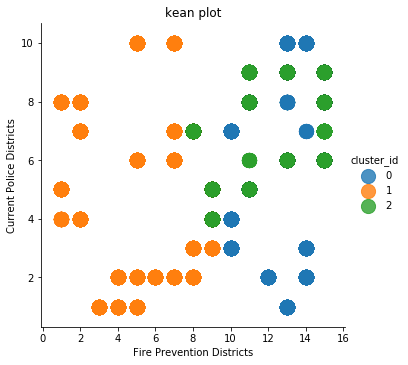

In [205]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_
df['cluster_id'] = kmeans.labels_
sns.lmplot('Fire Prevention Districts', 'Current Police Districts', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('kean plot')

In [206]:
kmeans.labels_

array([2, 2, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'kean plot')

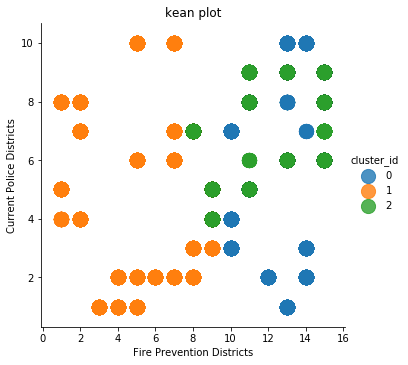

In [207]:
sns.lmplot('Fire Prevention Districts', 'Current Police Districts', data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")
plt.title('kean plot')